## Import

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "mass_filtered_smaller_30"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


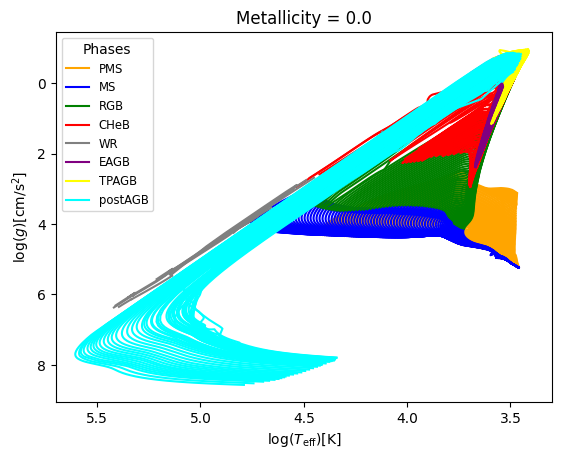

In [ ]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [5]:
print_uniques("star_mass", iso_df)
# print_uniques_count("star_mass", iso_df)

star_mass : 1467117 unique values, range [0.0999979840073621, 298.5447575808816]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


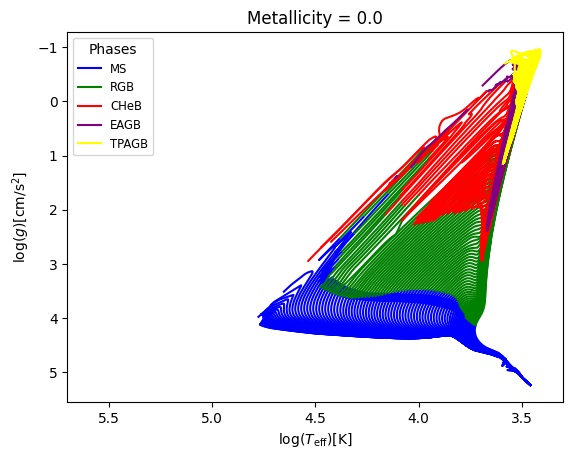

In [ ]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [7]:
print_uniques("star_mass", phase_filtered_iso_df)
# print_uniques_count("star_mass", phase_filtered_iso_df)

star_mass : 1140739 unique values, range [0.0999979840073621, 298.5447575808816]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1081175,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1081176,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1081177,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1081178,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


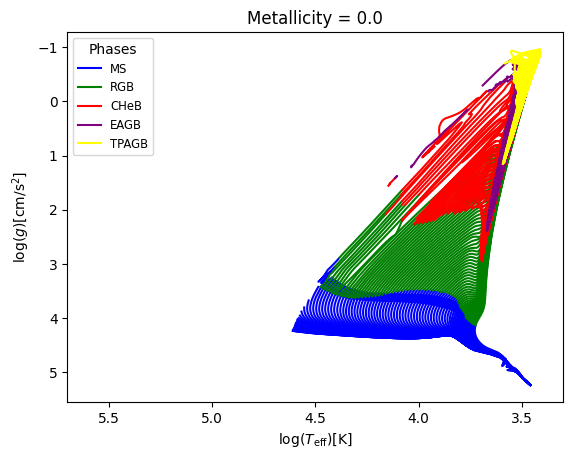

In [ ]:
phase_mass_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "star_mass" : ("<", 30)})
display(phase_mass_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_mass_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [10]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_mass_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 29.99765995263001
Median value in train data for the mass parameter: 1.9514999920340204
Mean value in train data for the mass parameter: 3.851653080202323
Range in train data for the radius parameter : -0.9974747647513328 - 3.1297545143214007
Median value in train data for the radius parameter: 1.5072104518462326
Mean value in train data for the radius parameter: 1.385840862716765

Testing set statistics:
Range in test data for the mass parameter : 0.0999982007747928 - 29.999136881366123
Median value in test data for the mass parameter: 1.9590473362171368
Mean value in test data for the mass parameter: 3.8509333967287525
Range in test data for the radius parameter : -0.9973627769638856 - 3.099278240688256
Median value in test data for the radius parameter: 1.5123719277747552
Mean value in test data for the radius parameter: 1.3902838056499245

(810885, 4) (270295, 4)
(810885, 2) (270295, 2)


## Model training

### Linear regression

In [ ]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_30 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.6337762001906275
RMSE :  3.0680531326363196
MAE :  1.8625649582591806
MedAE :  0.9704614695476756
CORR :  0.796100621914019
MAX_ER :  22.275998004260508
Percentiles : 
  75th percentile :  2.5078023059221053
  90th percentile :  4.418087316818078
  95th percentile :  5.966206505867041
  99th percentile :  13.188085715797563



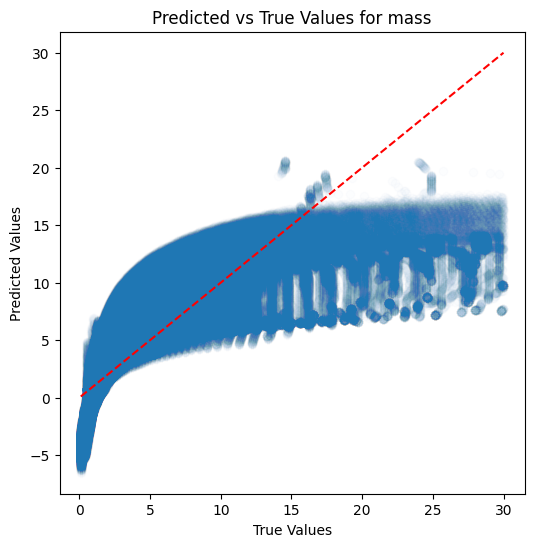

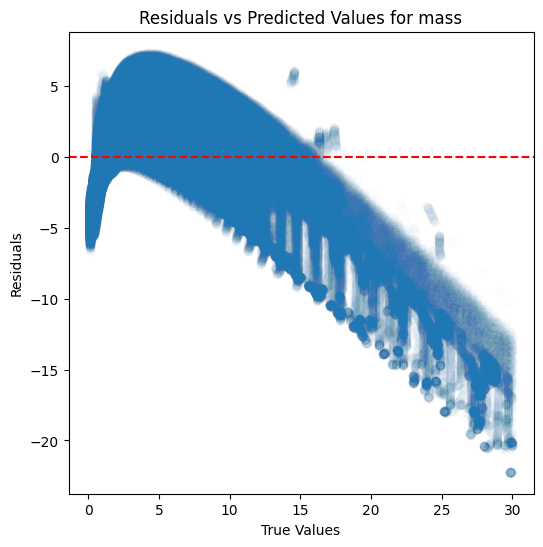

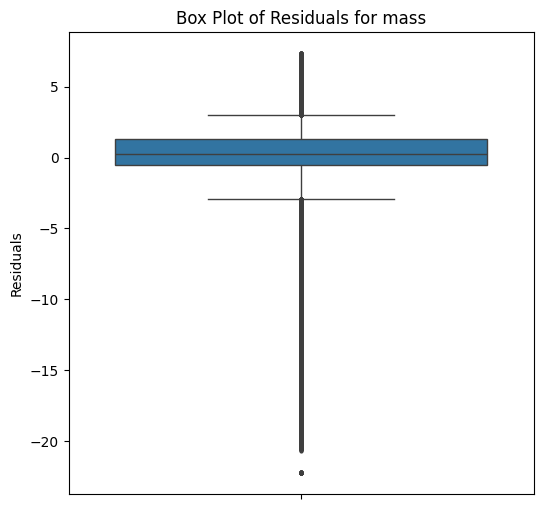

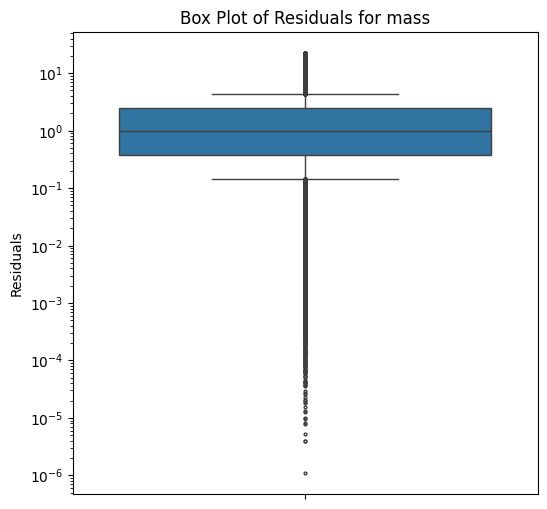

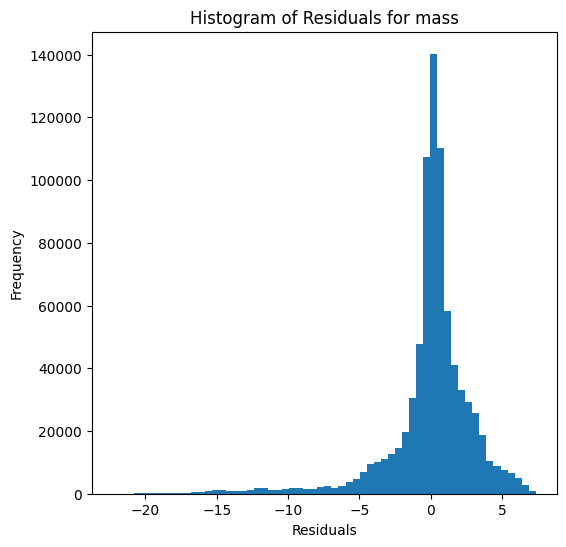

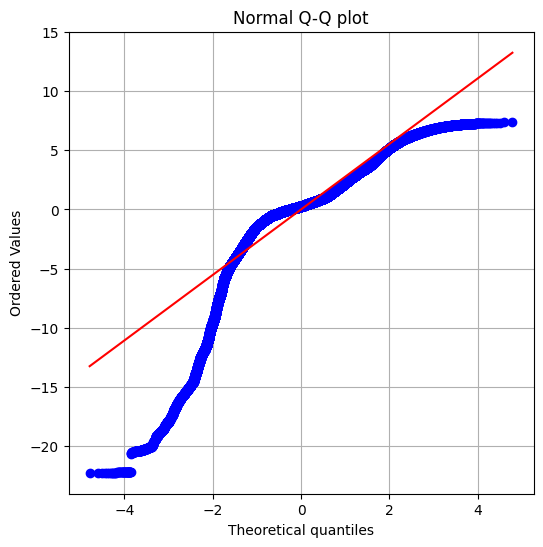


radius results:
RVE :  0.9925428351690286
RMSE :  0.0834915224254678
MAE :  0.06504086122918111
MedAE :  0.05338786997733952
CORR :  0.9962644403816882
MAX_ER :  0.3742776903813434
Percentiles : 
  75th percentile :  0.09236193853716301
  90th percentile :  0.1374947996657808
  95th percentile :  0.17088355841986347
  99th percentile :  0.22806925458173036



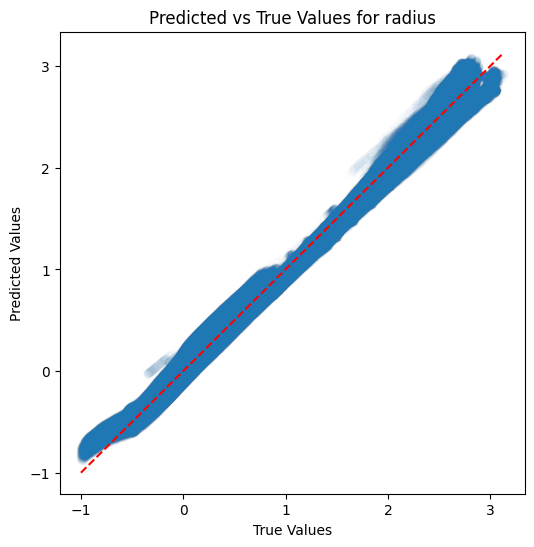

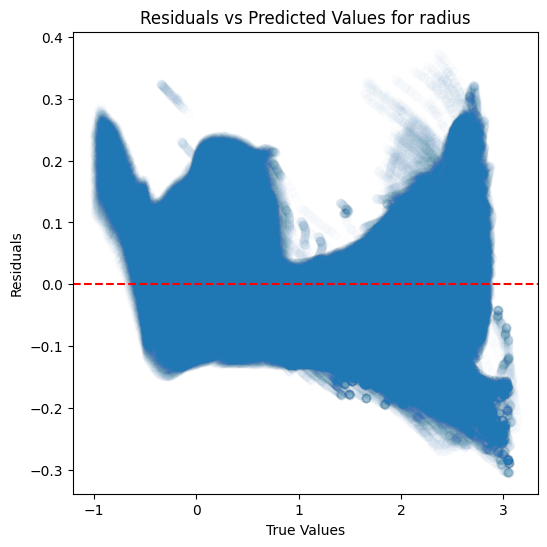

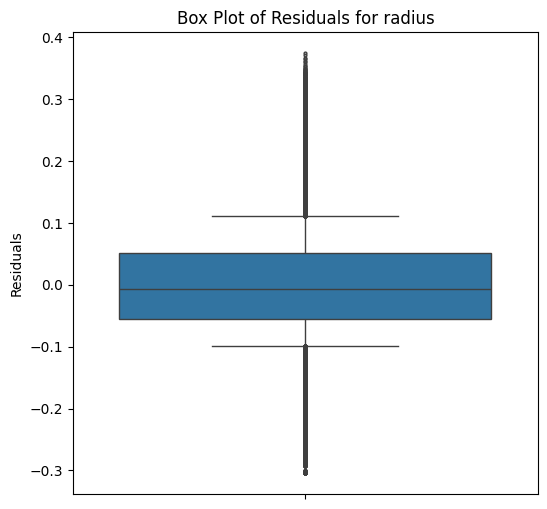

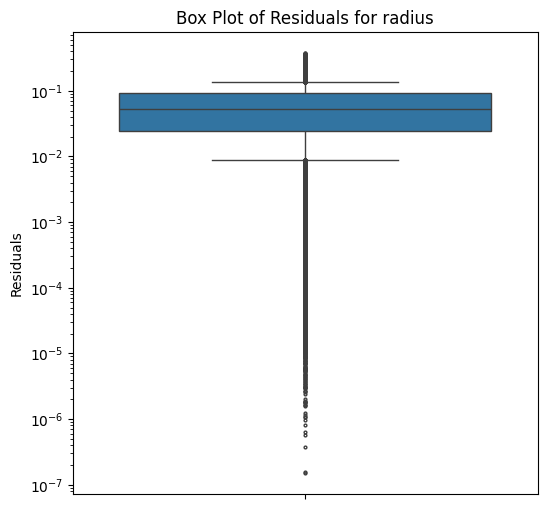

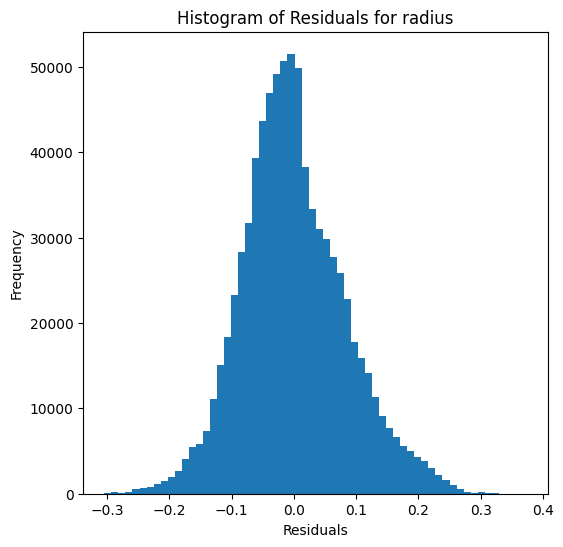

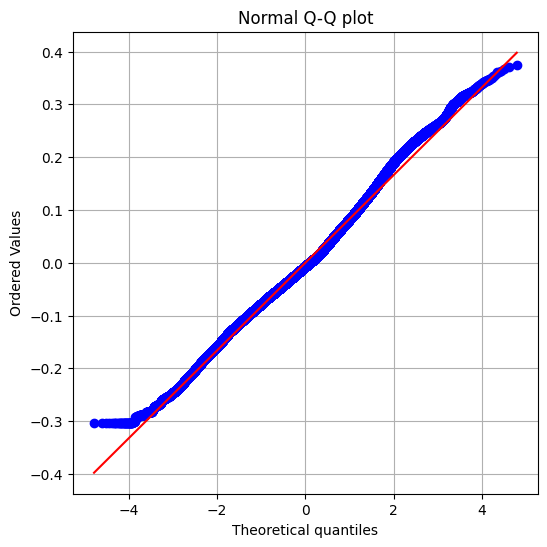

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_30 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9991042106776967
RMSE :  0.15173774303994475
MAE :  0.03878859107611028
MedAE :  0.005185512250251989
CORR :  0.9995521341551757
MAX_ER :  17.935150682122174
Percentiles : 
  75th percentile :  0.02793378948859182
  90th percentile :  0.10134573829956117
  95th percentile :  0.19048637131100435
  99th percentile :  0.43794075917126457



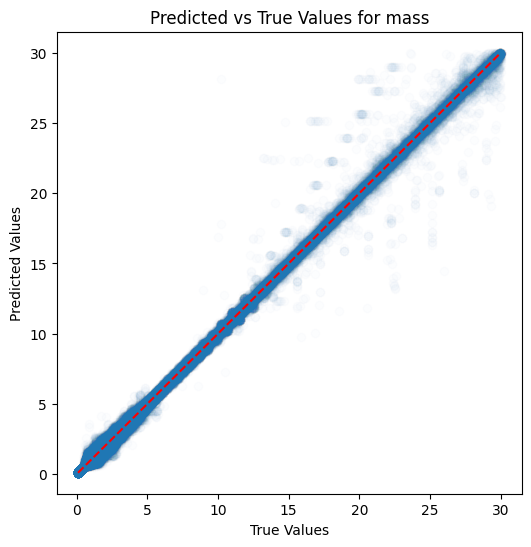

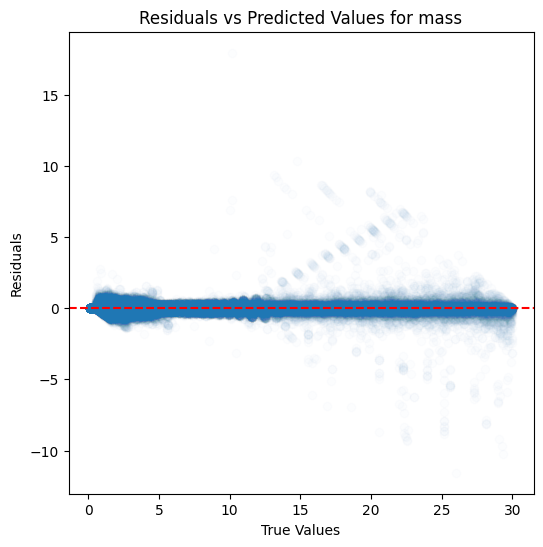

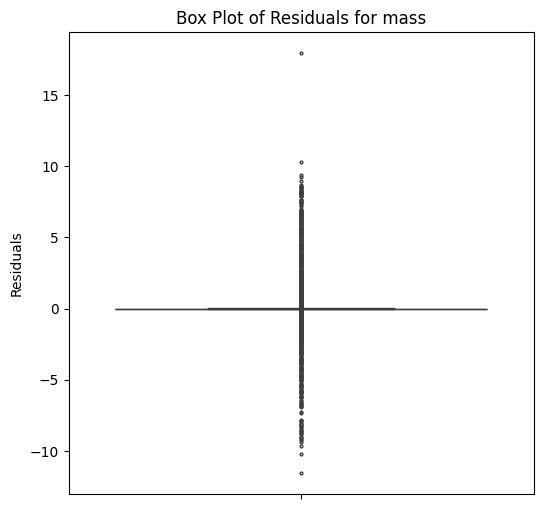

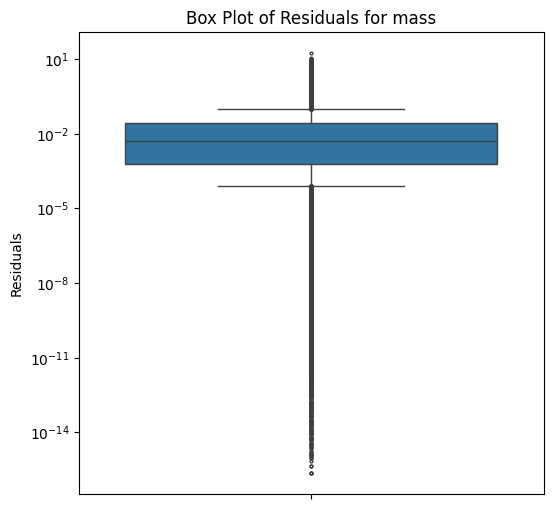

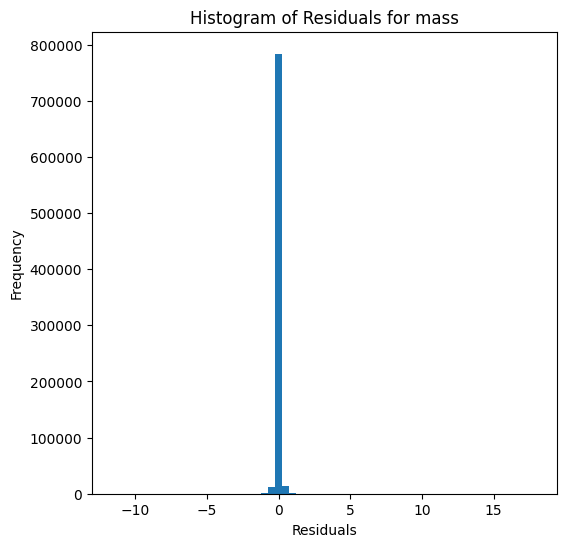

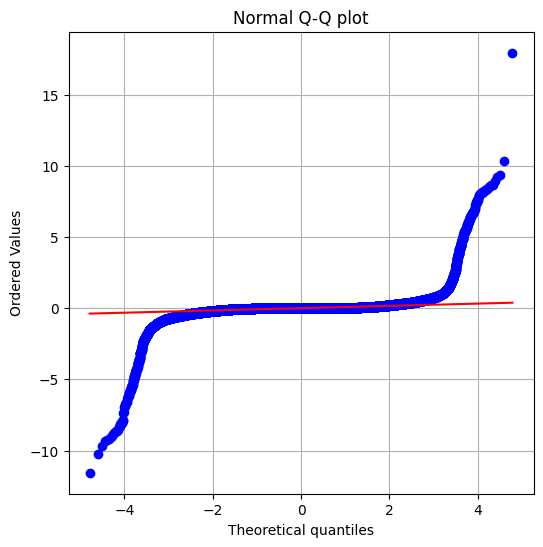


radius results:
RVE :  0.9998060609132219
RMSE :  0.01346455628956861
MAE :  0.00704487255291518
MedAE :  0.0034773860509238474
CORR :  0.9999030720445822
MAX_ER :  0.8580067469479523
Percentiles : 
  75th percentile :  0.008131452344696477
  90th percentile :  0.01612695238618964
  95th percentile :  0.025525846234654957
  99th percentile :  0.05849886648433058



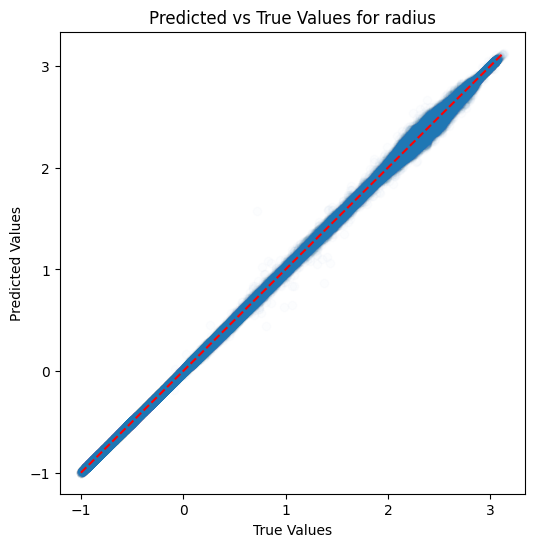

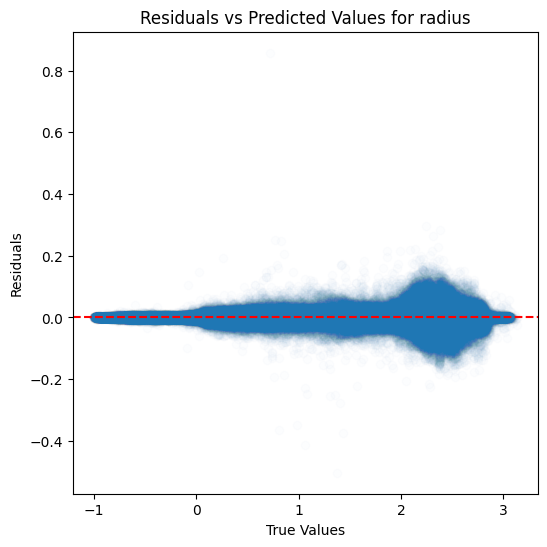

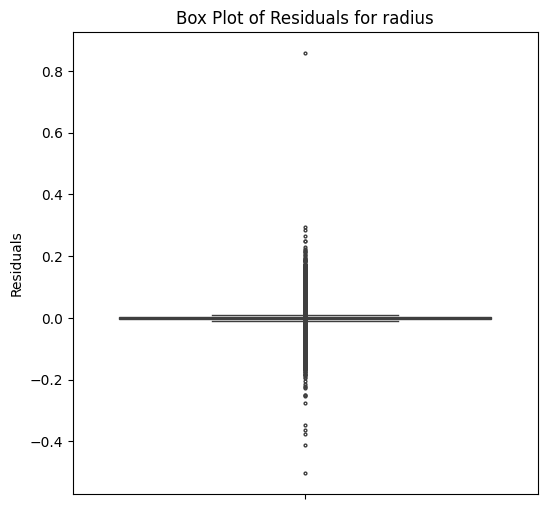

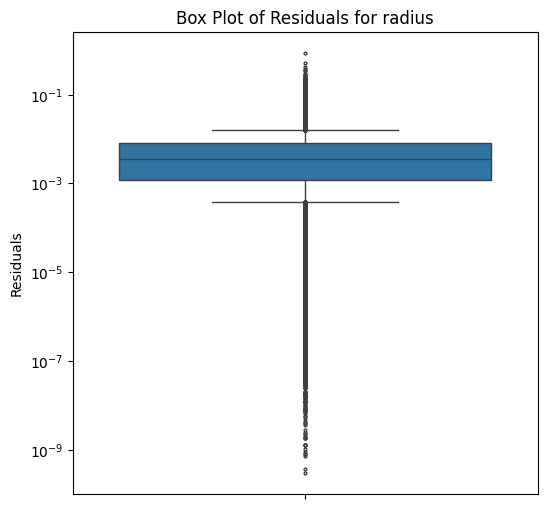

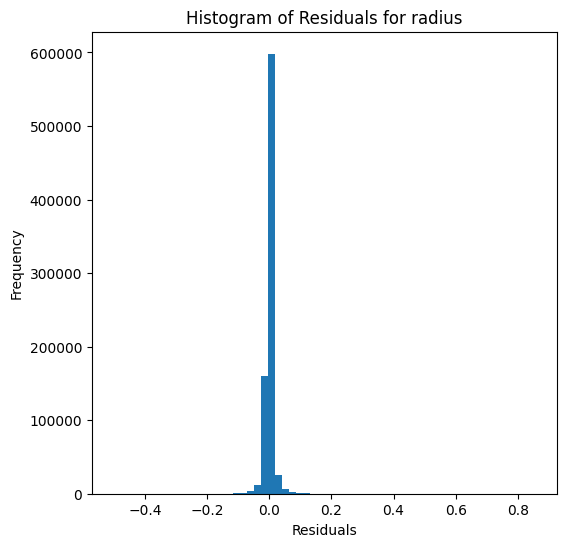

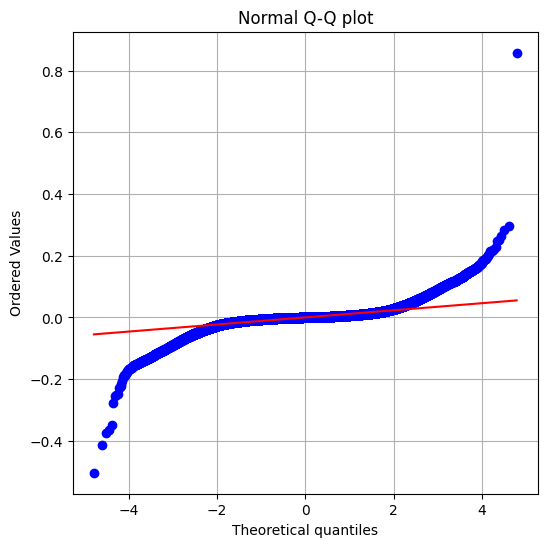

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_30 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9987882574795091
RMSE :  0.17649257491193215
MAE :  0.05900455725812496
MedAE :  0.013809519704404138
CORR :  0.9993981764539126
MAX_ER :  7.249228280742539
Percentiles : 
  75th percentile :  0.05757805374711644
  90th percentile :  0.15039828822981596
  95th percentile :  0.2401625257258325
  99th percentile :  0.5606352124821783



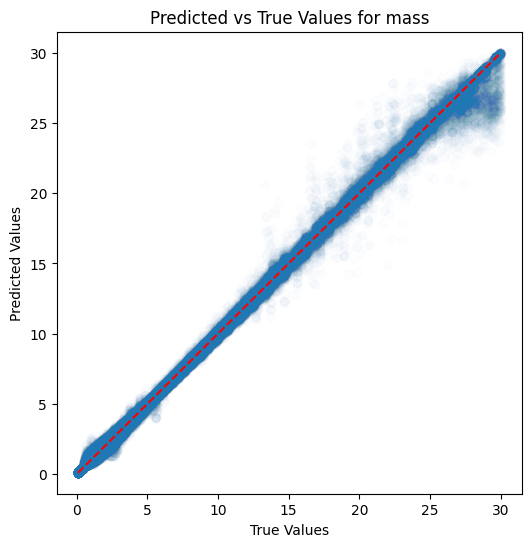

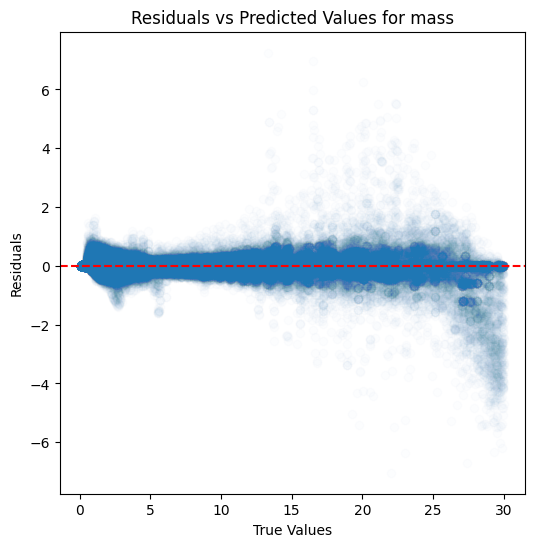

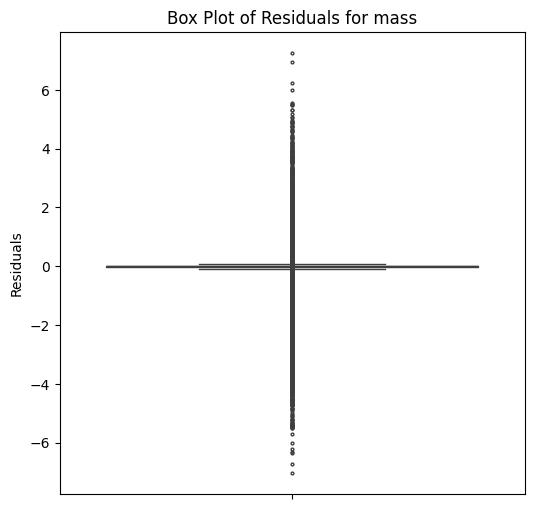

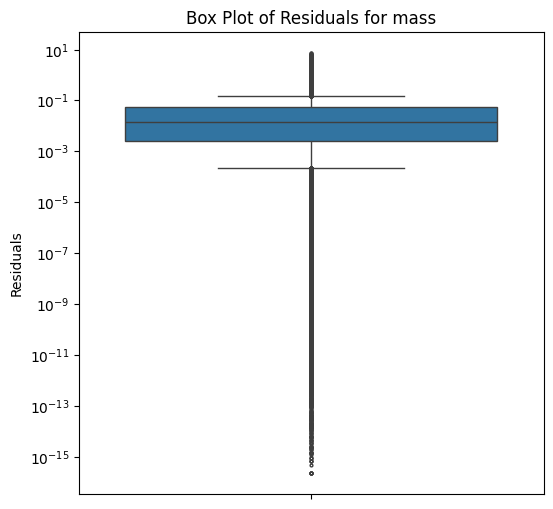

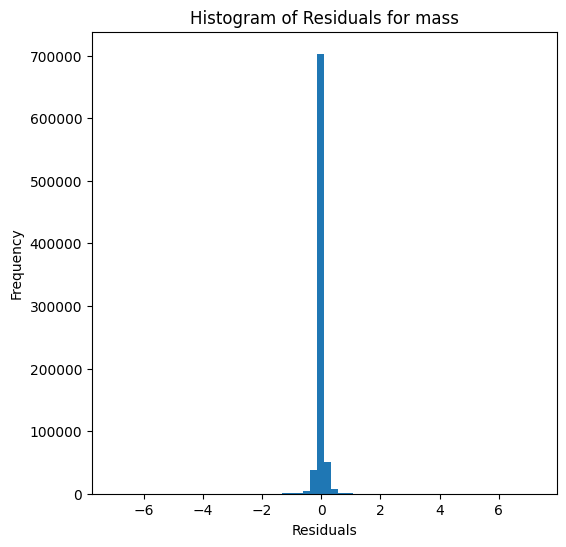

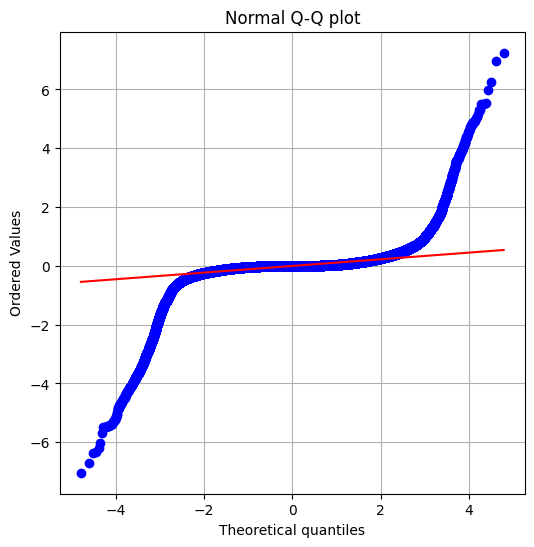


radius results:
RVE :  0.999845742270286
RMSE :  0.012009180907773
MAE :  0.00638546155915349
MedAE :  0.00305341283356797
CORR :  0.9999228811195526
MAX_ER :  0.25265660257402534
Percentiles : 
  75th percentile :  0.007110830776724253
  90th percentile :  0.015310602998896432
  95th percentile :  0.02450752679681489
  99th percentile :  0.05166876849250266



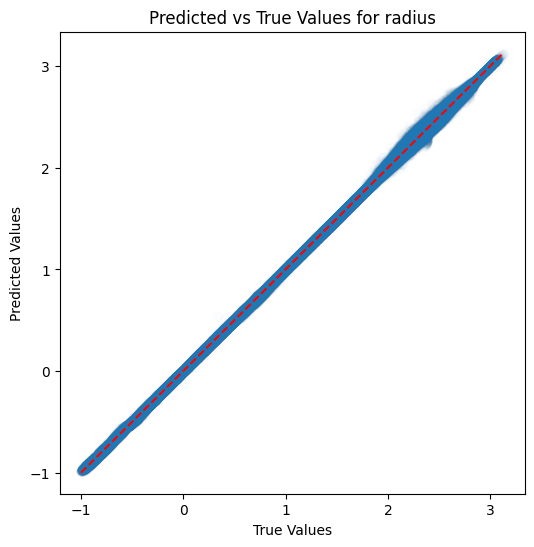

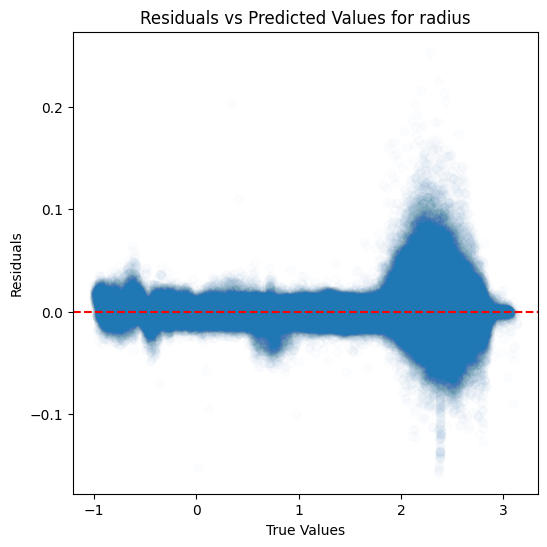

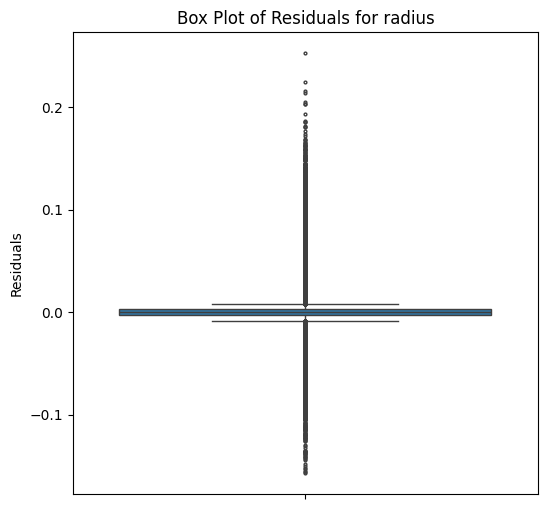

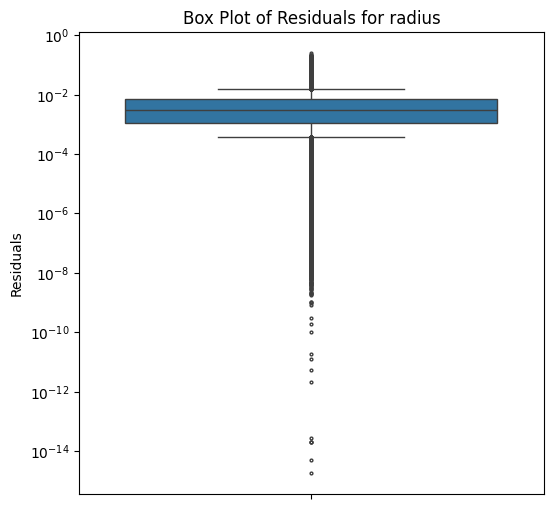

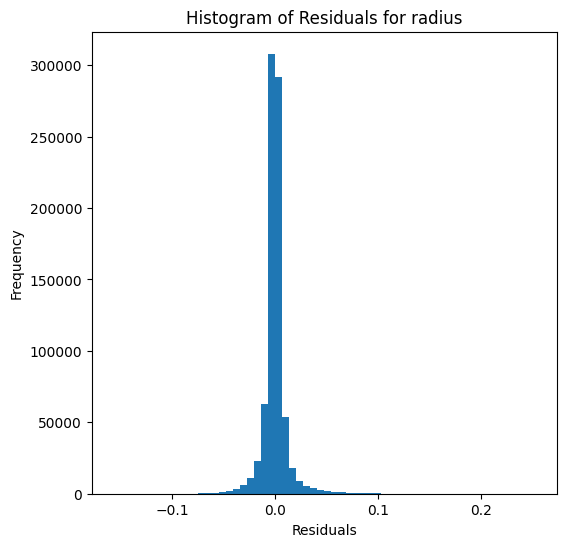

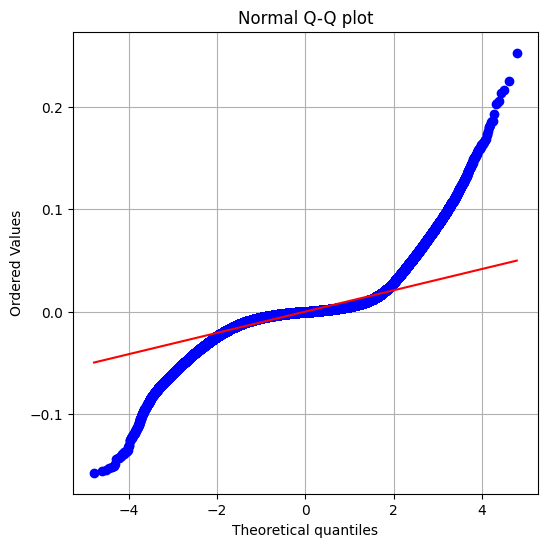

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_30 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9995570187900983
RMSE :  0.10670696338718122
MAE :  0.03223966018127886
MedAE :  0.007370679045348716
CORR :  0.999778486957788
MAX_ER :  7.167874253757592
Percentiles : 
  75th percentile :  0.028487238222992817
  90th percentile :  0.0829425021160219
  95th percentile :  0.13997761362641814
  99th percentile :  0.31606106636329895



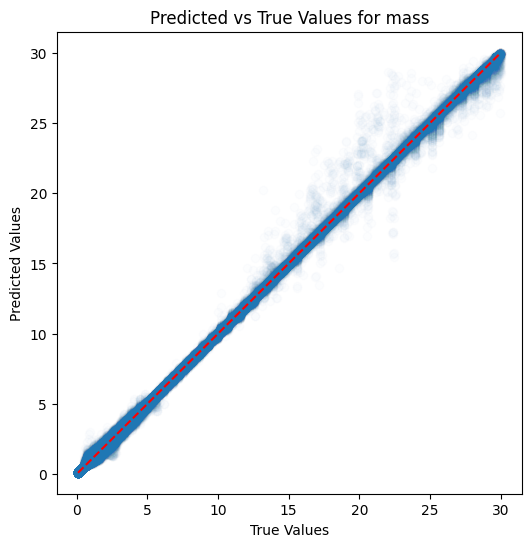

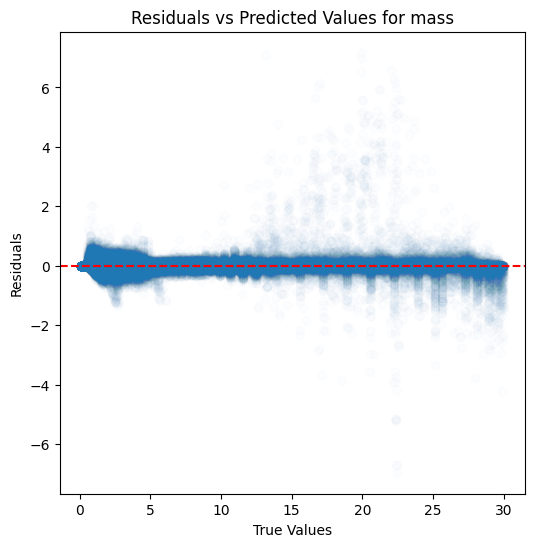

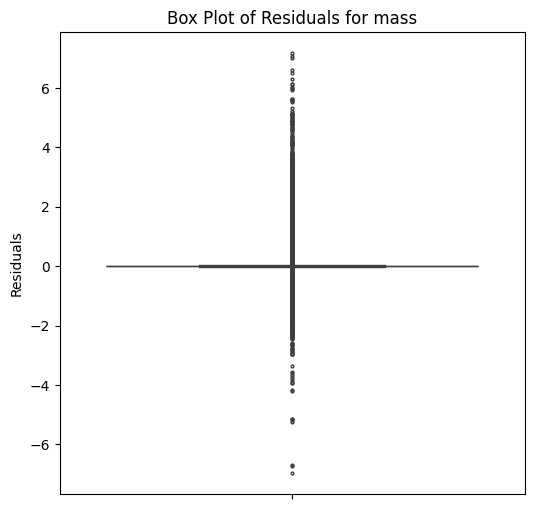

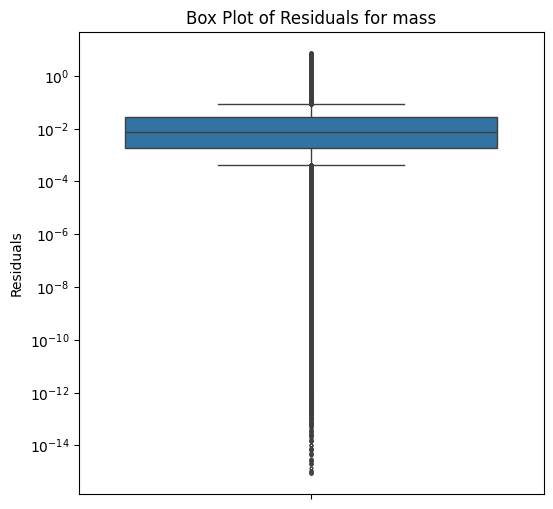

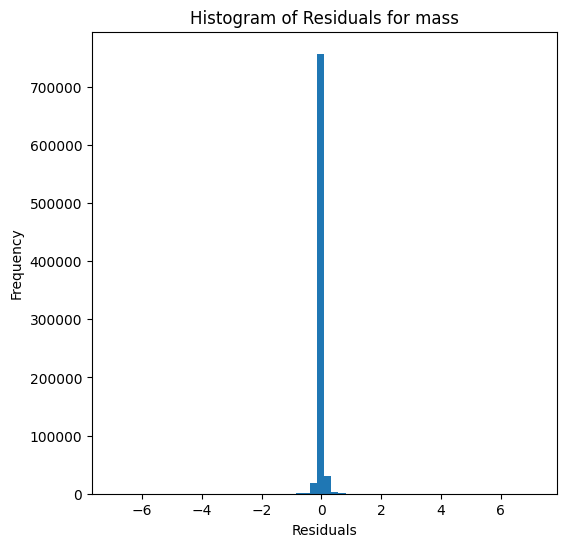

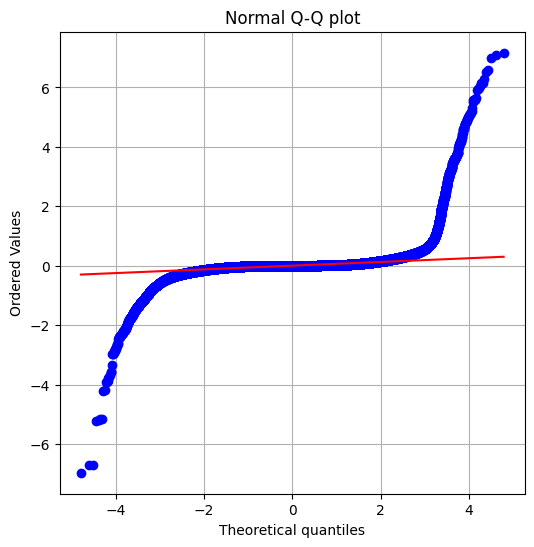


radius results:
RVE :  0.999911027099752
RMSE :  0.009120128374631557
MAE :  0.0045068366219739465
MedAE :  0.0018526338286604105
CORR :  0.9999555233337166
MAX_ER :  0.23453191984237343
Percentiles : 
  75th percentile :  0.004952866871243411
  90th percentile :  0.011117167727065957
  95th percentile :  0.017662793030507638
  99th percentile :  0.03956358585443714



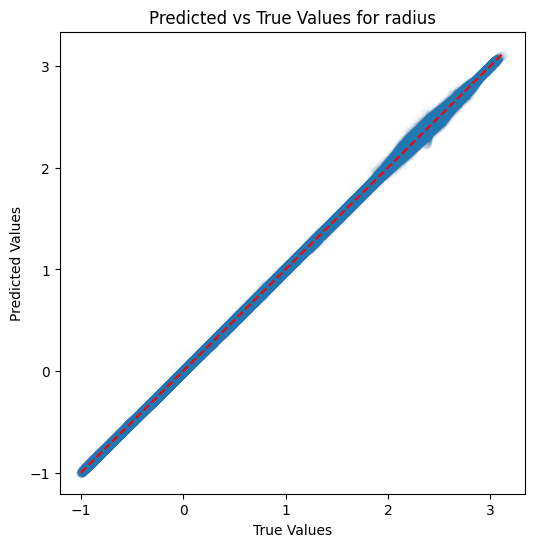

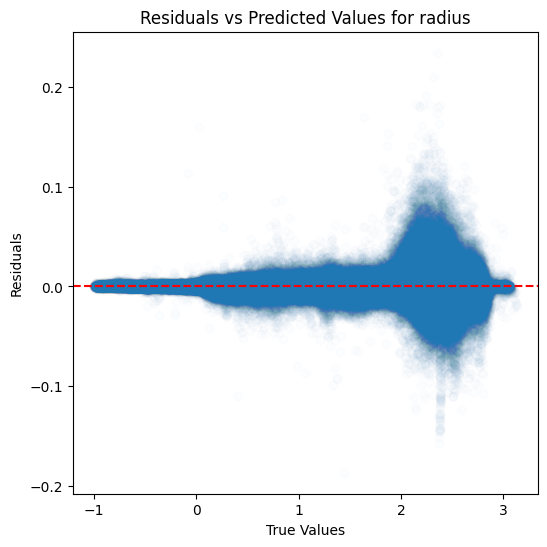

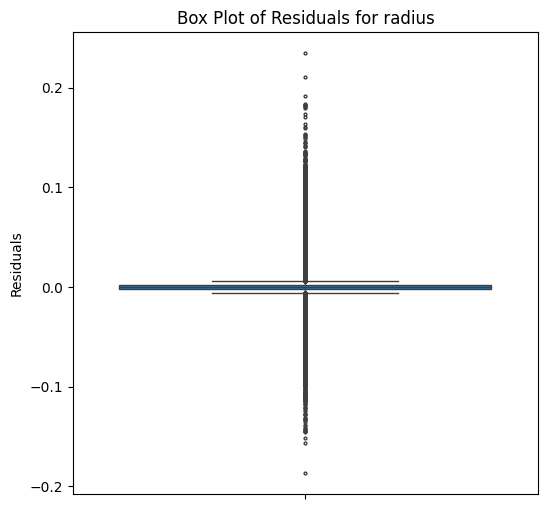

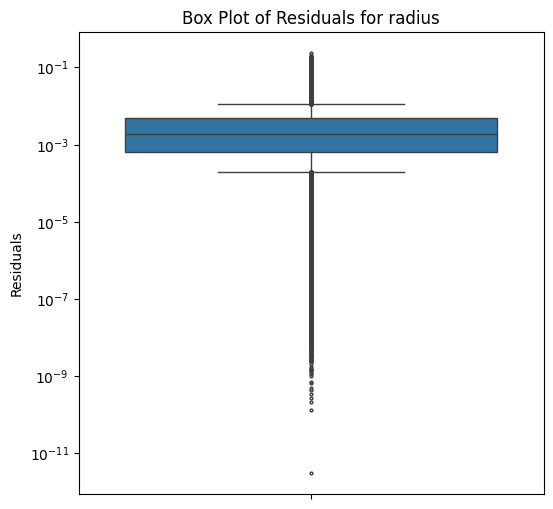

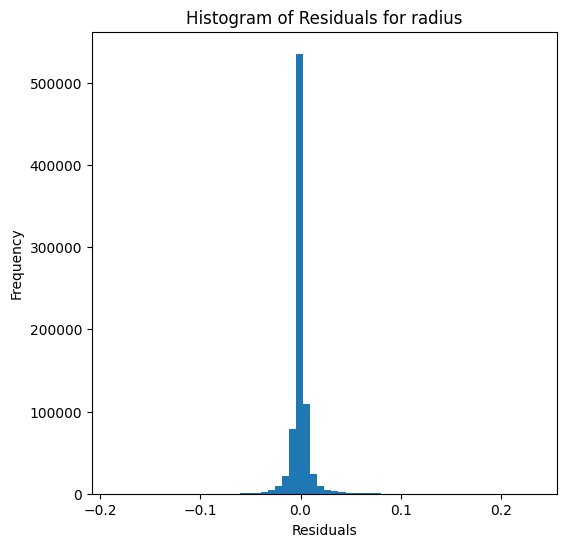

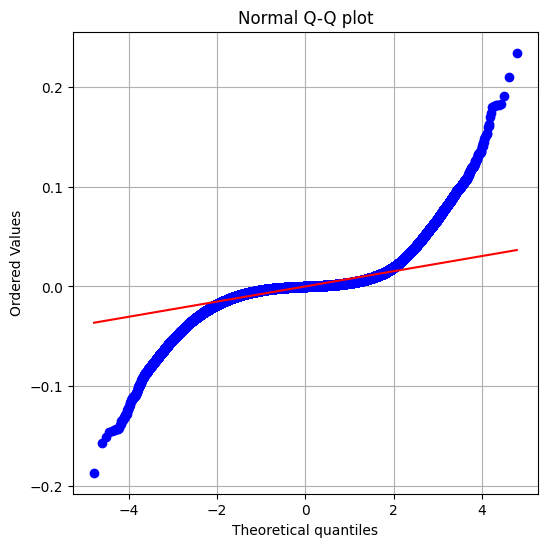

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_30 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9976992754549369
RMSE :  0.24317667946160926
MAE :  0.12283068281561701
MedAE :  0.06314096830128069
CORR :  0.9988489875150101
MAX_ER :  6.072611935101708
Percentiles : 
  75th percentile :  0.14617204756680158
  90th percentile :  0.27749126441262956
  95th percentile :  0.39727669061464055
  99th percentile :  0.9760708543739823



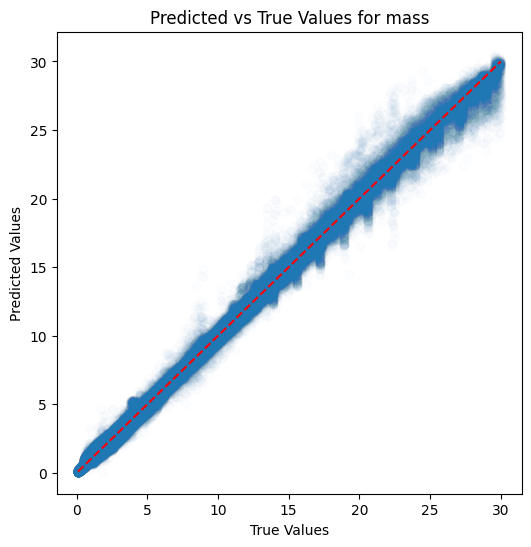

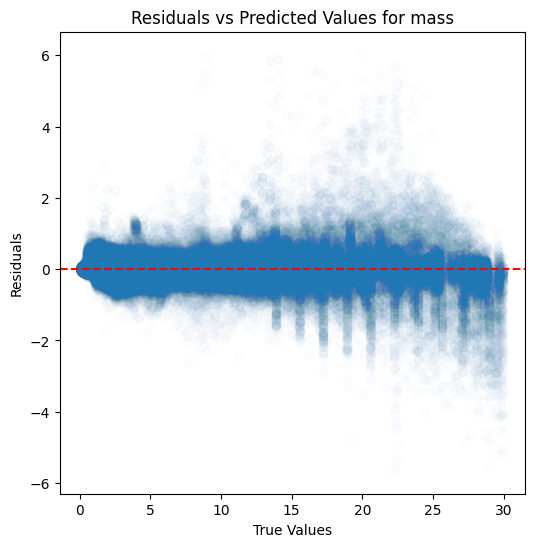

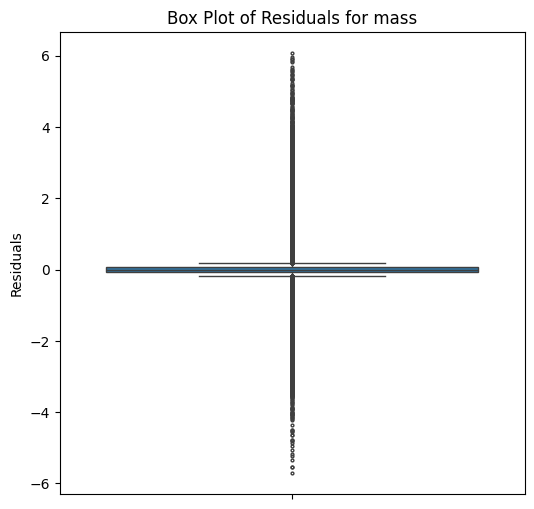

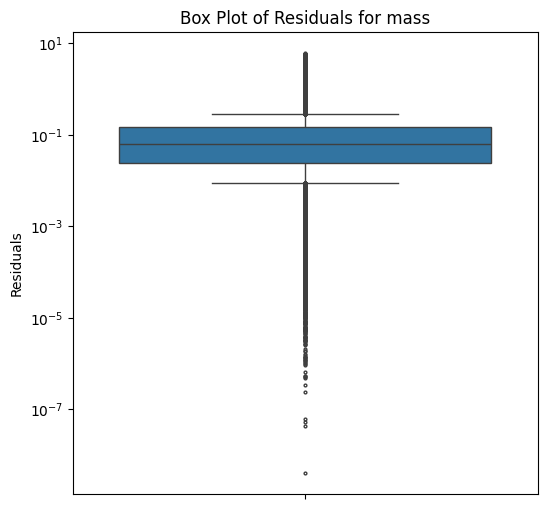

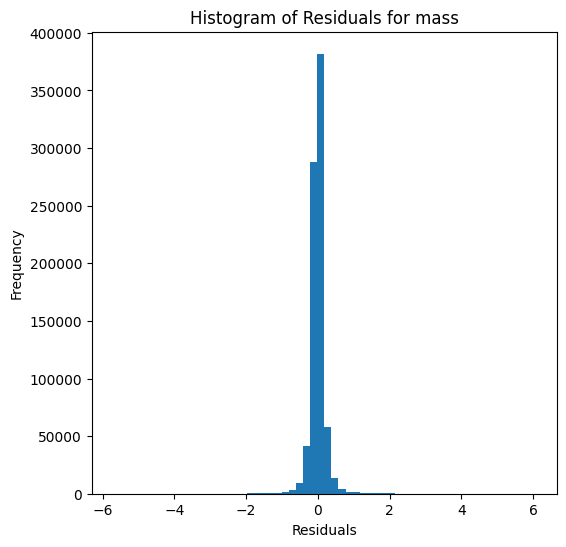

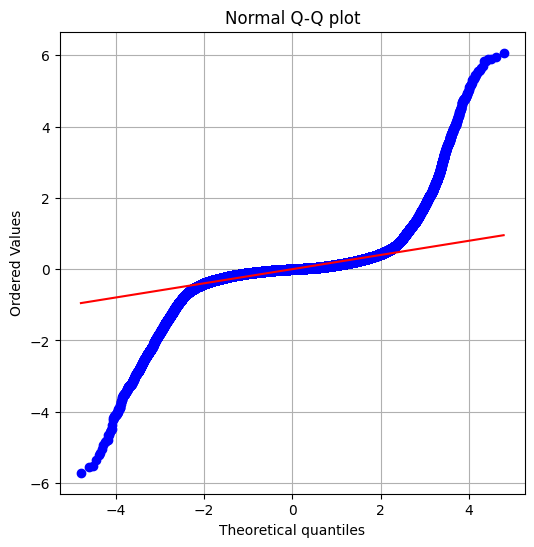


radius results:
RVE :  0.999676980016293
RMSE :  0.01737682271670121
MAE :  0.012737733218130255
MedAE :  0.009657425748406778
CORR :  0.999838479954102
MAX_ER :  0.2759740654684639
Percentiles : 
  75th percentile :  0.017372333891301217
  90th percentile :  0.02715654830265099
  95th percentile :  0.03490663676484774
  99th percentile :  0.05602195625754084



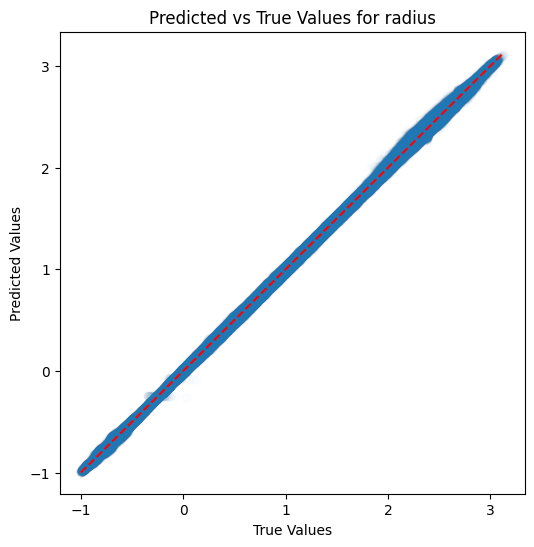

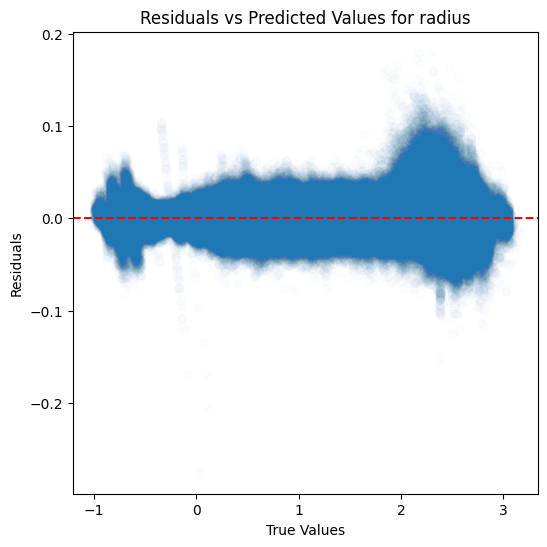

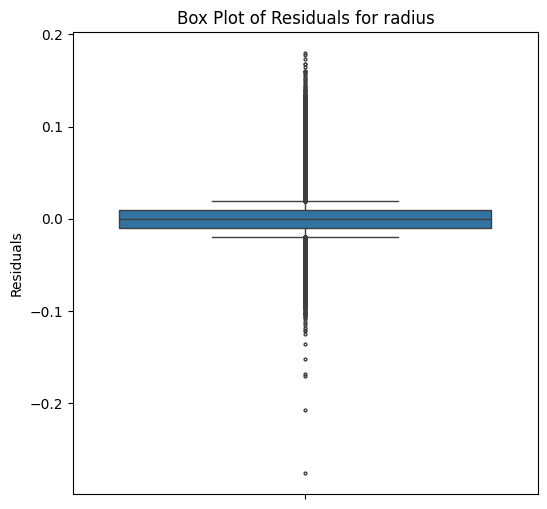

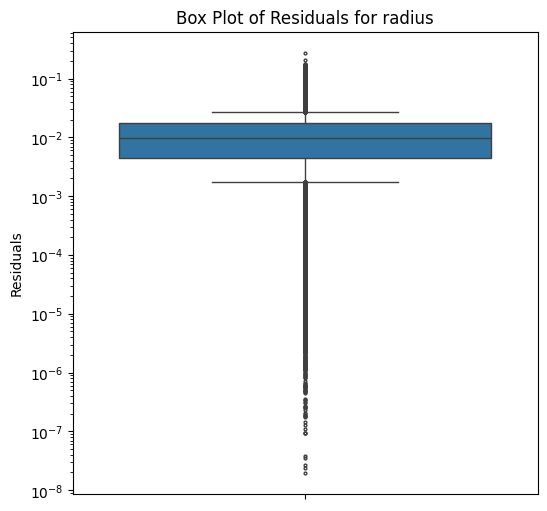

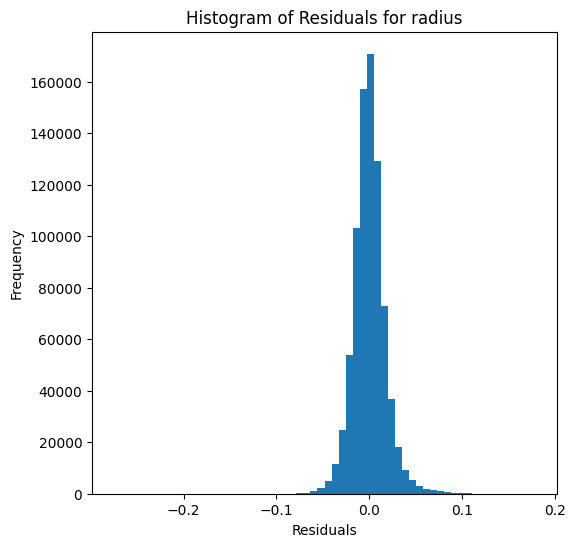

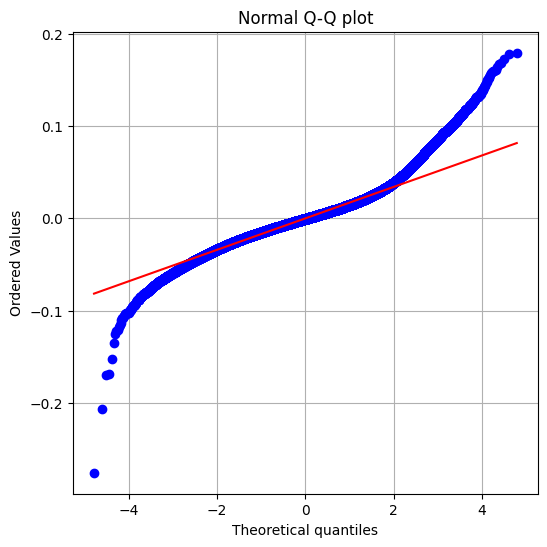

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [ ]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_30 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.042472438335100275
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.04714732747123319
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.038964380247772726
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.03993202368983607
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.03895149412922648

mass results:
RVE :  0.9939583579459095
RMSE :  0.3943428608727035
MAE :  0.156273867940004
MedAE :  0.08032508872687827
CORR :  0.9969916469259911
MAX_ER :  14.883159168001066
Percentiles : 
  75th percentile :  0.16148456208014395
  90th percentile :  0.308272713063048
  95th percentile :  0.4655467674703552
  99th percentile :  1.3684319664683313



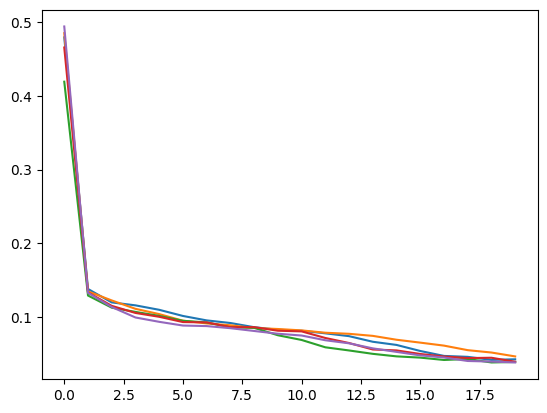

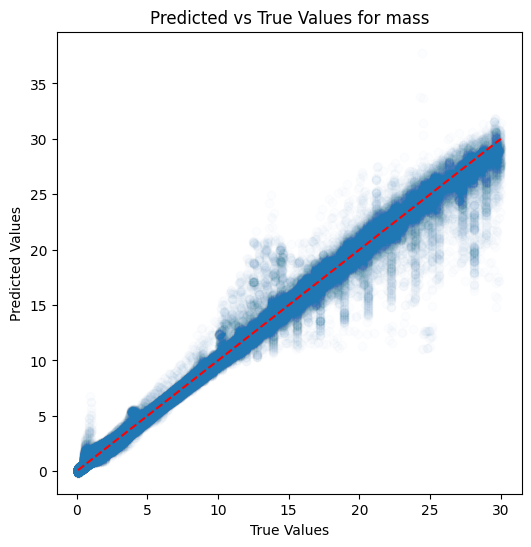

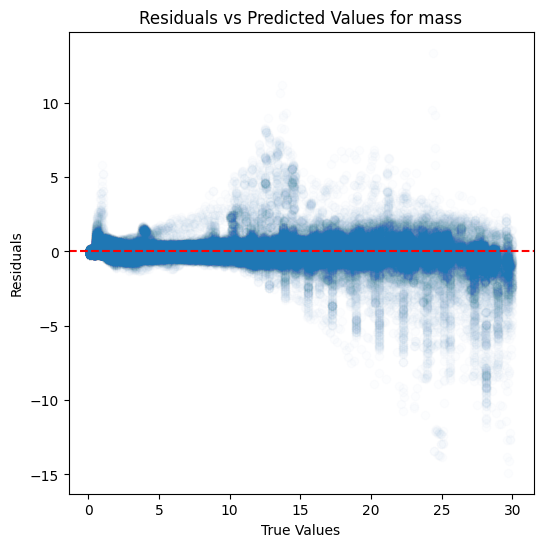

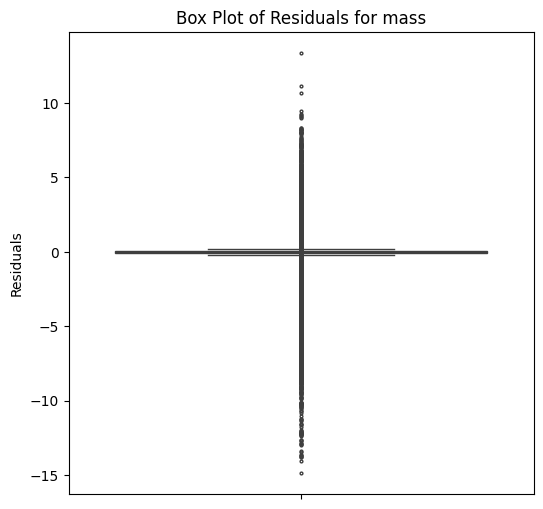

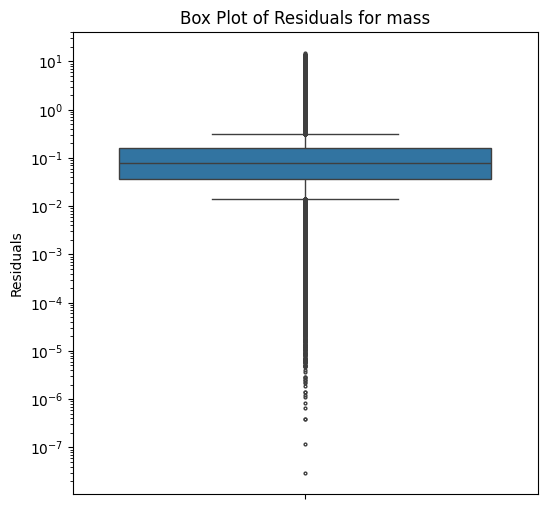

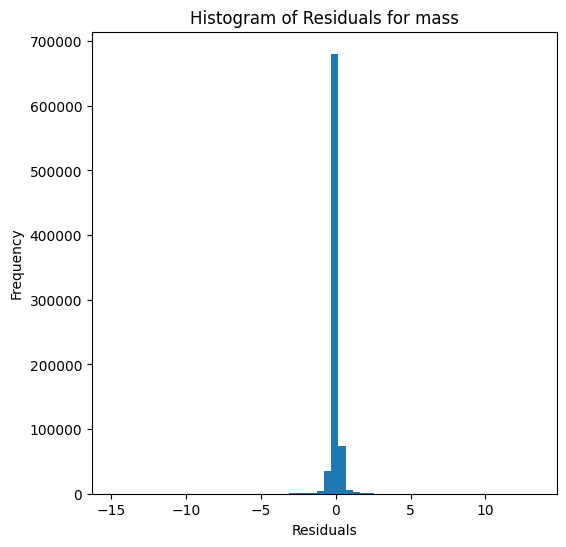

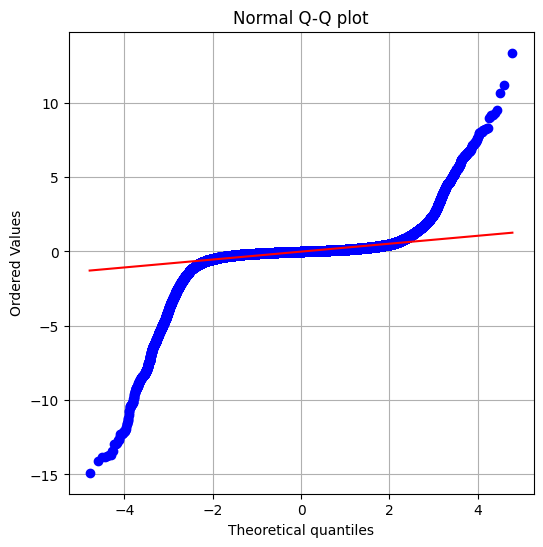


radius results:
RVE :  0.9987759834874893
RMSE :  0.034357031439120785
MAE :  0.025551826662590912
MedAE :  0.020208523360502495
CORR :  0.9993881726160077
MAX_ER :  0.49841860154233464
Percentiles : 
  75th percentile :  0.03488343983024267
  90th percentile :  0.05297127344347158
  95th percentile :  0.06685133793561161
  99th percentile :  0.1041137956906212



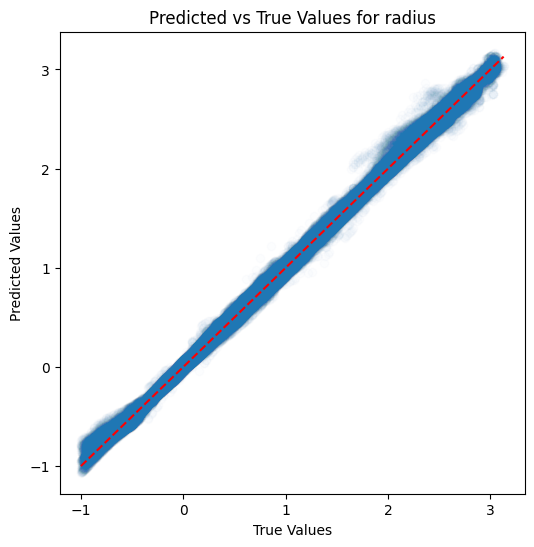

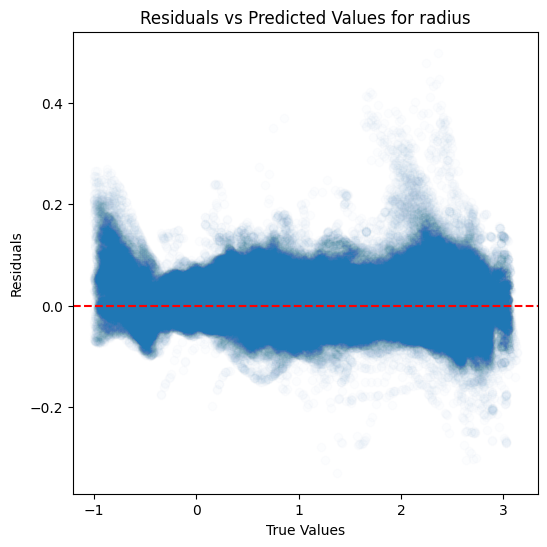

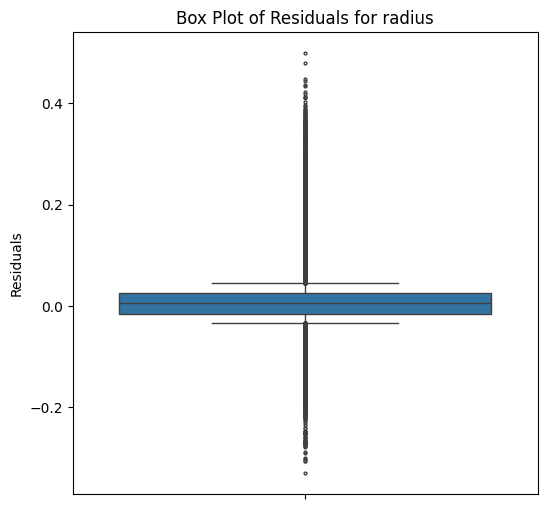

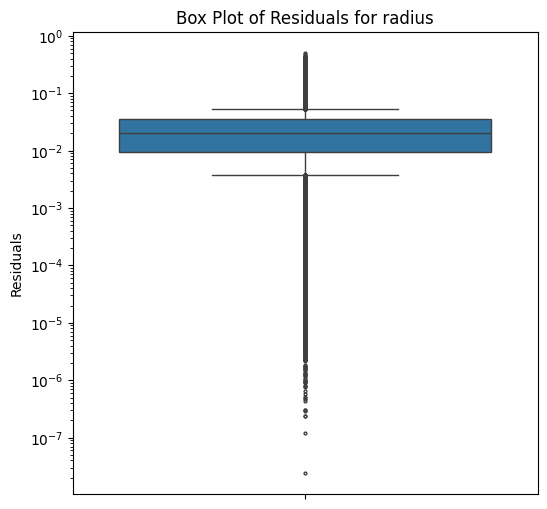

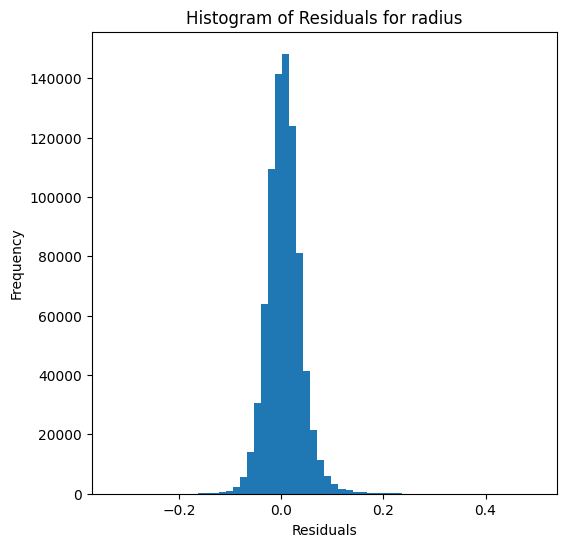

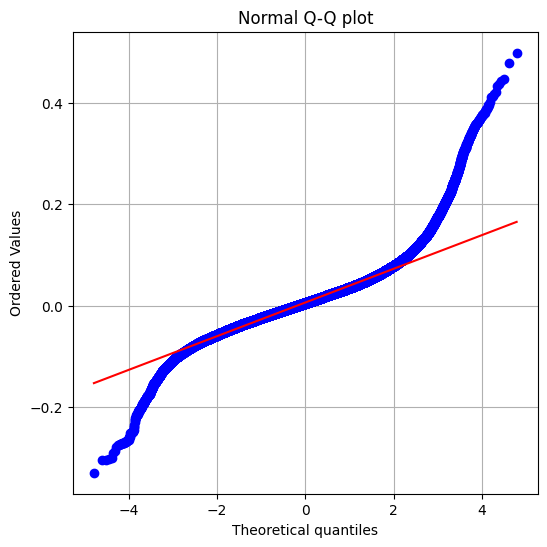

In [ ]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)